In [1]:
import pandas as pd

In [2]:
# data = pd.read_csv("extra_csv/Skyserver_SQL8_22_2024_8_39_07_PM.csv",  skiprows=1) # Dataset that we have

In [3]:
# data = pd.read_csv("extra_csv/Skyserver_SQL8_22_2024_8_39_07_PM.csv",  skiprows=1) # Dataset that we have
data = pd.read_csv('../../../all_data.csv', index_col=0) # Big datapull without ordering
# data = pd.read_csv("data_with_photo_z.csv", index_col=0) # Processed data with photo_z


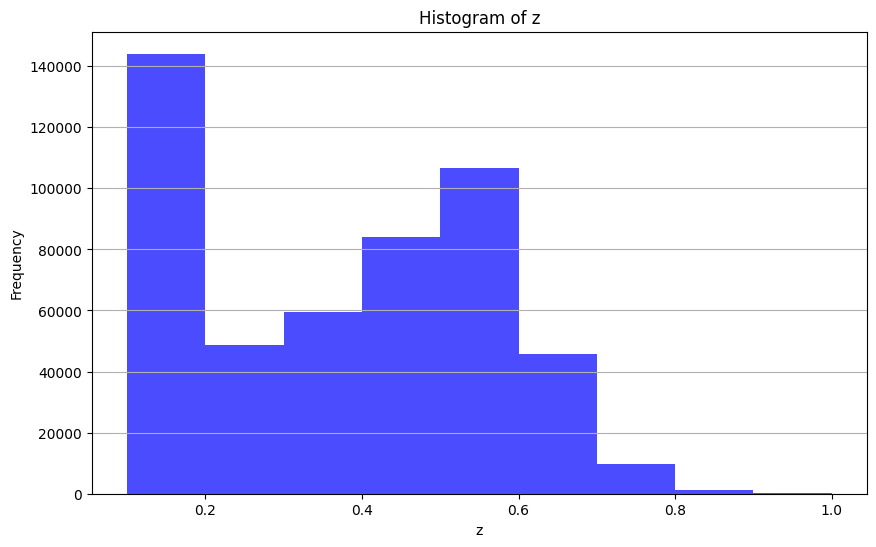

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Example DataFrame creation
np.random.seed(0)  # For reproducibility
# z_values = np.random.uniform(0.1, 1, 1000)
# df = pd.DataFrame({'z': z_values})

df = data.copy()


# Create histogram binning
bins = np.arange(0.1, 1.1, 0.1)
hist, bin_edges = np.histogram(df['z'], bins=bins)

# Create a DataFrame to store the histogram frequencies
hist_df = pd.DataFrame({'bin_start': bin_edges[:-1], 'bin_end': bin_edges[1:], 'frequency': hist})

# Cumulative frequency calculation
hist_df['cumulative_frequency'] = hist_df['frequency'].cumsum()

# Total frequency
total_frequency = hist_df['frequency'].sum()

# Determine the threshold for 70-30 split
threshold = 0.7 * total_frequency

# Identify the bins for the 70% split
hist_df['split'] = np.where(hist_df['cumulative_frequency'] <= threshold, 'train', 'test')

# Initialize train and test columns to 0
df['train'] = 0
df['test'] = 0

# Plotting function
def plot_histogram(dataframe, column):
    plt.figure(figsize=(10, 6))
    plt.hist(dataframe[column], bins=np.arange(0.1, 1.1, 0.1), color='blue', alpha=0.7)
    plt.title('Histogram of ' + column)
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.grid(axis='y')
    plt.show()

# Call the function to plot the histogram
plot_histogram(df, 'z')

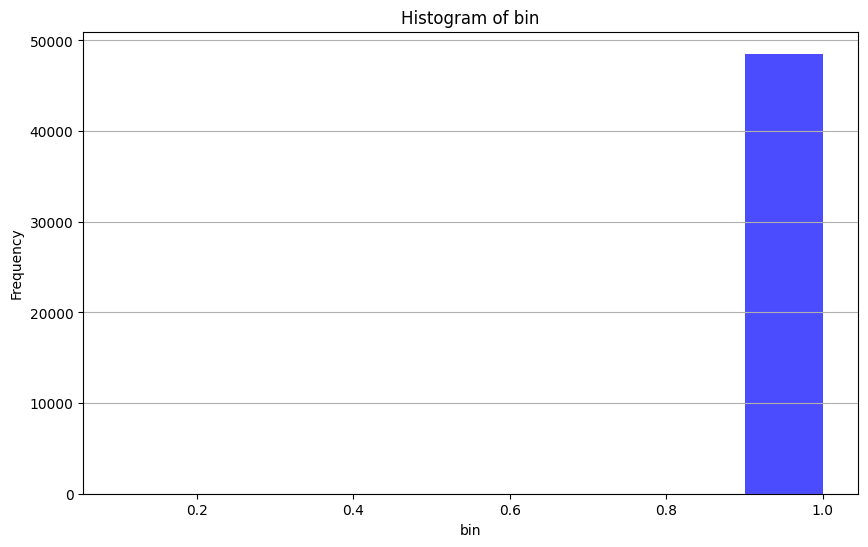

In [7]:
plot_histogram(df, 'bin')

In [12]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Example DataFrame creation
np.random.seed(0)  # For reproducibility
# z_values = np.random.uniform(0.1, 1, 1000)
# df = pd.DataFrame({'z': z_values})
df = data.copy()

# Create bins
bins = np.arange(0.1, 1.1, 0.1)
df['bin'] = pd.cut(df['z'], bins=bins, labels=False)

# Stratified sampling based on the bins
train_df, test_df = train_test_split(df, test_size=0.3, stratify=df['bin'], random_state=42)

# Assign train and test columns
df['train'] = 0
df['test'] = 0
df.loc[train_df.index, 'train'] = 1
df.loc[test_df.index, 'test'] = 1

# Plotting function
def plot_histogram(dataframe, column, title):
    plt.figure(figsize=(10, 6))
    plt.hist(dataframe[column], bins=np.arange(0.1, 1.1, 0.1), color='blue', alpha=0.7)
    plt.title(title)
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.grid(axis='y')
    plt.show()

# Plot histograms for train and test sets
plot_histogram(train_df, 'z', 'Histogram of Train Set')
plot_histogram(test_df, 'z', 'Histogram of Test Set')

# Display the first few rows of the DataFrame
print(df.head())

ValueError: Input y contains NaN.